In [33]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [34]:
truenews = pd.read_csv('true_dataset.csv')
fakenews = pd.read_csv('fake_dataset.csv')

In [35]:
fakenews.head()

,created_at,date,user_id,username,name,tweet,link,POS tagged,Label
0,1.653843e+12,2022-05-29 23:42:07,215839128,hendra_roestoe,HendraRoestoeMulyana,saya lebih percaya kpd dr siti fadilah supari...,https://twitter.com/hendra_roestoe/status/1530...,"[('percaya', 'n'), ('kpd', 'n'), ('dr', 'n'), ...",HOAKS
1,1.653725e+12,2022-05-28 15:11:02,1362243328276762626,wahiidin,wahiidin,smoga sj bukan jd bisnis ada yg bilang klo b...,https://twitter.com/wahiidin/status/1530461634...,"[('smoga', 'n'), ('sj', 'n'), ('jd', 'n'), ('b...",HOAKS
2,1.653711e+12,2022-05-28 11:05:26,1528282299091275777,UmJihan69,Um Jihan,logikanya kenapa ke afrika afrika daya beli...,https://twitter.com/UmJihan69/status/153039982...,"[('logikanya', 'n'), ('afrika', None), ('afrik...",HOAKS
3,1.653672e+12,2022-05-28 00:24:34,1426251818527444992,KaiAndromeda,Mandroid|Kai,wajar komnas ini ada hanya utk menguatkan bi...,https://twitter.com/KaiAndromeda/status/153023...,"[('wajar', 'n'), ('komnas', 'n'), ('utk', None...",HOAKS
4,1.653642e+12,2022-05-27 15:58:27,1131257783486013440,MasN4jib,71B,bisnis vaksin ga diitung,https://twitter.com/MasN4jib/status/1530111177...,"[('bisnis', 'n'), ('vaksin', 'n'), ('ga', 'n')...",HOAKS


In [36]:
truenews.head()

,created_at,date,user_id,username,name,tweet,link,POS tagged,Label
0,1.655545e+12,2022-06-18 16:42:27,55507370,tvOneNews,tvOne,apa penyebab varian baru virus corona kembali ...,https://twitter.com/tvOneNews/status/153809478...,"[('penyebab', 'n'), ('varian', None), ('virus'...",FAKTA
1,1.655512e+12,2022-06-18 07:19:23,41730943,VIVAcoid,VivaCoid,virus corona atau covid terus bermutasi hin...,https://twitter.com/VIVAcoid/status/1537953082...,"[('virus', 'n'), ('corona', 'n'), ('covid', 'n...",FAKTA
2,1.655211e+12,2022-06-14 19:53:52,705224376422010881,Berita_Corona,Berita Corona,kenapa varian dan subvarian baru virus corona ...,https://twitter.com/Berita_Corona/status/15366...,"[('varian', None), ('subvarian', None), ('viru...",FAKTA
3,1.655210e+12,2022-06-14 19:40:52,17128975,CNNIndonesia,CNN Indonesia,kenapa varian dan subvarian baru virus corona ...,https://twitter.com/CNNIndonesia/status/153669...,"[('varian', None), ('subvarian', None), ('viru...",FAKTA
4,1.655183e+12,2022-06-14 12:06:11,1403680930842042374,BroAkbar27,𝕬𝖐𝖇𝖆𝖗 ,pemerintah mewaspadai munculnya virus corona v...,https://twitter.com/BroAkbar27/status/15365757...,"[('pemerintah', 'n'), ('mewaspadai', 'n'), ('m...",FAKTA


In [37]:
# Combine the 2 DataFrames into a single data frame
df = pd.concat([truenews, fakenews])
df["Article"] = df["name"] + df["tweet"]
df.sample(frac = 1) #Shuffle 100%

,created_at,date,user_id,username,name,tweet,link,POS tagged,Label,Article
7,1.653609e+12,2022-05-27 06:55:50,1340273082926125057,ZPembayun,Zidnia Pembayun,amp bisnis vaksin pastinya,https://twitter.com/ZPembayun/status/152997462...,"[('amp', 'n'), ('bisnis', 'n'), ('vaksin', 'n'...",HOAKS,Zidnia Pembayun amp bisnis vaksin pastinya
8,1.653582e+12,2022-05-26 23:16:31,1344682642961141760,AndiPitopang6,Andi Pitopang,bentar lagi bisnis vaksin cacar monyet,https://twitter.com/AndiPitopang6/status/15298...,"[('bentar', 'n'), ('bisnis', 'n'), ('vaksin', ...",HOAKS,Andi Pitopang bentar lagi bisnis vaksin cacar ...
17,1.580268e+12,2020-01-29 10:25:02,864608695,najibonel,6:00pm,virus corona menyebar lewat hp xiaomi,https://twitter.com/najibonel/status/122235997...,"[('virus', 'n'), ('corona', 'n'), ('menyebar',...",HOAKS,6:00pmvirus corona menyebar lewat hp xiaomi
6,1.655171e+12,2022-06-14 08:50:27,2890721762,LINIKINI_ID,LINIKINI_ID,commuters hati hati ada varian baru nih v...,https://twitter.com/LINIKINI_ID/status/1536526...,"[('commuters', 'n'), ('hati', 'v'), ('hati', N...",FAKTA,LINIKINI_IDcommuters hati hati ada varian bar...
15,1.580277e+12,2020-01-29 12:48:06,1140215810230640640,apasihlex_,Woy.,wuhan jiayou virus corona menyebar lewat hp...,https://twitter.com/apasihlex_/status/12223959...,"[('wuhan', 'n'), ('jiayou', 'n'), ('virus', 'n...",HOAKS,Woy. wuhan jiayou virus corona menyebar lewa...
2,1.655211e+12,2022-06-14 19:53:52,705224376422010881,Berita_Corona,Berita Corona,kenapa varian dan subvarian baru virus corona ...,https://twitter.com/Berita_Corona/status/15366...,"[('varian', None), ('subvarian', None), ('viru...",FAKTA,Berita Coronakenapa varian dan subvarian baru ...
3,1.653672e+12,2022-05-28 00:24:34,1426251818527444992,KaiAndromeda,Mandroid|Kai,wajar komnas ini ada hanya utk menguatkan bi...,https://twitter.com/KaiAndromeda/status/153023...,"[('wajar', 'n'), ('komnas', 'n'), ('utk', None...",HOAKS,Mandroid|Kaiwajar komnas ini ada hanya utk m...
20,1.580215e+12,2020-01-28 19:29:43,1085366701514866688,rfldrkptr_,Rifaldi Raka Putra,virus corona menyebar lewat hp xiaomi jika ad...,https://twitter.com/rfldrkptr_/status/12221346...,"[('virus', 'n'), ('corona', 'n'), ('menyebar',...",HOAKS,Rifaldi Raka Putravirus corona menyebar lewat ...
7,1.655169e+12,2022-06-14 08:17:09,1351236840066609171,Naraera1,Nara€ra,meski kenaikan kasus covid di indonesia bel...,https://twitter.com/Naraera1/status/1536518068...,"[('kenaikan', 'n'), ('covid', 'n'), ('indonesi...",FAKTA,Nara€rameski kenaikan kasus covid di indone...
16,1.580270e+12,2020-01-29 10:45:53,262026799,MSNindonesia,MSNIndonesia,viral virus corona menyebar lewat hp xiaomi da...,https://twitter.com/MSNindonesia/status/122236...,"[('viral', None), ('virus', 'n'), ('corona', '...",HOAKS,MSNIndonesiaviral virus corona menyebar lewat ...


In [38]:
print("No of missing title\t:", df[df['date'].isna()].shape[0])
print("No of missing text\t:", df[df['name'].isna()].shape[0])
print("No of missing source\t:", df[df['tweet'].isna()].shape[0])
print("No of missing label\t:", df[df['Label'].isna()].shape[0])

No of missing title	: 0
No of missing text	: 0
No of missing source	: 0
No of missing label	: 0


In [39]:
df = df.fillna('')

In [40]:
df['date_name_tweet'] = df['date'] + ' ' + df['name'] + ' ' + df['tweet']
df.head()

,created_at,date,user_id,username,name,tweet,link,POS tagged,Label,Article,date_name_tweet
0,1.655545e+12,2022-06-18 16:42:27,55507370,tvOneNews,tvOne,apa penyebab varian baru virus corona kembali ...,https://twitter.com/tvOneNews/status/153809478...,"[('penyebab', 'n'), ('varian', None), ('virus'...",FAKTA,tvOneapa penyebab varian baru virus corona kem...,2022-06-18 16:42:27 tvOne apa penyebab varian ...
1,1.655512e+12,2022-06-18 07:19:23,41730943,VIVAcoid,VivaCoid,virus corona atau covid terus bermutasi hin...,https://twitter.com/VIVAcoid/status/1537953082...,"[('virus', 'n'), ('corona', 'n'), ('covid', 'n...",FAKTA,VivaCoidvirus corona atau covid terus bermu...,2022-06-18 07:19:23 VivaCoid virus corona atau...
2,1.655211e+12,2022-06-14 19:53:52,705224376422010881,Berita_Corona,Berita Corona,kenapa varian dan subvarian baru virus corona ...,https://twitter.com/Berita_Corona/status/15366...,"[('varian', None), ('subvarian', None), ('viru...",FAKTA,Berita Coronakenapa varian dan subvarian baru ...,2022-06-14 19:53:52 Berita Corona kenapa varia...
3,1.655210e+12,2022-06-14 19:40:52,17128975,CNNIndonesia,CNN Indonesia,kenapa varian dan subvarian baru virus corona ...,https://twitter.com/CNNIndonesia/status/153669...,"[('varian', None), ('subvarian', None), ('viru...",FAKTA,CNN Indonesiakenapa varian dan subvarian baru ...,2022-06-14 19:40:52 CNN Indonesia kenapa varia...
4,1.655183e+12,2022-06-14 12:06:11,1403680930842042374,BroAkbar27,𝕬𝖐𝖇𝖆𝖗 ,pemerintah mewaspadai munculnya virus corona v...,https://twitter.com/BroAkbar27/status/15365757...,"[('pemerintah', 'n'), ('mewaspadai', 'n'), ('m...",FAKTA,𝕬𝖐𝖇𝖆𝖗 pemerintah mewaspadai munculnya virus c...,2022-06-14 12:06:11 𝕬𝖐𝖇𝖆𝖗  pemerintah mewaspa...


In [41]:
df = df[df['Label']!='']
print(df['Label'].unique())

['FAKTA' 'HOAKS']


In [42]:
df.loc[df['Label'] == 'hoaks', 'label'] = 'FAKE'
df.loc[df['Label'] == 'Hoaks', 'label'] = 'FAKE'

In [43]:
no_of_fakes = df.loc[df['Label'] == 'HOAKS'].count()[0]
no_of_trues = df.loc[df['Label'] == 'FAKTA'].count()[0]
print(no_of_fakes)
print(no_of_trues)

21
16


In [44]:
stop_words = set(stopwords.words('indonesian'))

def clean(text):
    # Lowering letters
    text = text.lower()

    # Removing html tags
    text = re.sub(r'<[^>]*>', '', text)

    # Removing twitter usernames
    text = re.sub(r'@[A-Za-z0-9]+','',text)

    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]','',text)

    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)

    word_tokens = word_tokenize(text)

    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)

    # Joining words
    text = (' '.join(filtered_sentence))
    return text

In [45]:
df['date_name_tweet'] = df['date_name_tweet'].apply(clean)

In [46]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['date_name_tweet'].values)
X = X.toarray()

In [47]:
y = df['Label'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)

In [49]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [50]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
1.0


In [51]:
predictions = clf.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, predictions)

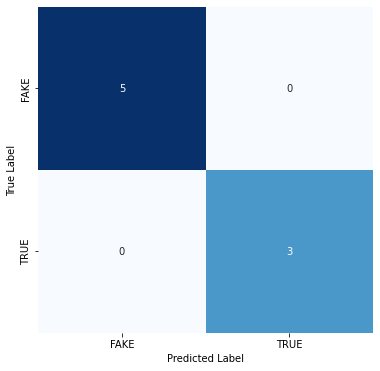

In [54]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()